Dashboard building with temperature and abudannce of specific pollinators

import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import Data

In [3]:
x = "pollinator_count_data-final.csv"
y = pd.read_csv("plant_on_campus_frequency.csv", sep = ',')

Clean up the imported data

In [4]:
#want to convert acronyms to full names 
#(hoverfly, honeybee, bumblebee, sweatbee, wasp, leafcutter, fly, beatle, butterfly)

#setting to print all the rows 
pd.set_option('display.max_rows', None)

#observation data for pollinators
df = pd.read_csv(x,sep = ',')

#plants on campus data 
df_frequency = pd.read_csv("plant_on_campus_frequency.csv",sep = ',')

#convert european carder bee ( ECB), mason bee and carpenter bee to the leafcutter bee group (LF)
df['pollinator'] = df['pollinator'].replace(['ECB','MB','CB'],'LB')
#convert No information (NI) and unidentified bee (UB) to the Other pollinator group (OP)
df['pollinator'] = df['pollinator'].replace(['NI','UB'],'OP')

#replacing values within dataframe to favored/changed names exp. Bumble
df['pollinator'] = df['pollinator'].replace(['BUT'],'Butterfly')
df['pollinator'] = df['pollinator'].replace(['W'],'Wasp')
df['pollinator'] = df['pollinator'].replace(['HF'],'Hover Fly')
df['pollinator'] = df['pollinator'].replace(['BVO','BS','BMI','BME','BU','BI','BFL','BF','BB'],'Bumble')
df['pollinator'] = df['pollinator'].replace(['SB'],'Sweat')
df['pollinator'] = df['pollinator'].replace(['HB'],'Honey')
df['pollinator'] = df['pollinator'].replace(['LB'],'Leaf Cutter')



#using where statement to seperate OP to beetles and flies 

# beetle 
df['pollinator'] = np.where((df['pollinator'] == 'OP') & (df['insect_order'] == 'coleoptera'), 'Beetle', df['pollinator'])
print(df['pollinator'])

# flies 
df['pollinator'] =  np.where((df['pollinator'] == 'OP') & (df['insect_order'] == 'diptera'),'Fly',df['pollinator'] )
print(df[['pollinator','insect_order']])

#droping all other pollinator from the data because not interested in other pollinators in data analysis
df = df.drop(df[df['pollinator'] == 'OP'].index)
print(df[['pollinator','insect_order']])

0            Bumble
1            Bumble
2            Bumble
3            Bumble
4            Bumble
5            Bumble
6            Bumble
7            Bumble
8            Bumble
9            Bumble
10           Bumble
11           Bumble
12           Bumble
13           Bumble
14           Bumble
15           Bumble
16           Bumble
17           Bumble
18           Bumble
19           Bumble
20           Bumble
21           Bumble
22           Bumble
23           Bumble
24           Bumble
25           Bumble
26           Bumble
27           Bumble
28           Bumble
29           Bumble
30           Bumble
31           Bumble
32           Bumble
33           Bumble
34           Bumble
35           Bumble
36           Bumble
37           Bumble
38           Bumble
39           Bumble
40           Bumble
41           Bumble
42           Bumble
43           Bumble
44           Bumble
45           Bumble
46           Bumble
47           Bumble
48           Bumble
49           Bumble


In [5]:

#find the count of pollinator groups in the csv and return a percentage
pol_count = df.groupby(['pollinator'])['pollinator'].count()
print('The individual pollinator count: \n', pol_count)
print('The # of total pollinators: \n', len(df))
print('Percentage of pollinator distribution count: \n',(pol_count/len(df))*100)

The individual pollinator count: 
 pollinator
Beetle          14
Bumble         602
Butterfly       17
Fly             41
Honey          581
Hover Fly      304
Leaf Cutter     29
Sweat          267
Wasp            48
Name: pollinator, dtype: int64
The # of total pollinators: 
 1903
Percentage of pollinator distribution count: 
 pollinator
Beetle          0.735681
Bumble         31.634262
Butterfly       0.893326
Fly             2.154493
Honey          30.530741
Hover Fly      15.974777
Leaf Cutter     1.523910
Sweat          14.030478
Wasp            2.522333
Name: pollinator, dtype: float64


Adding in data regarding the date into seperate columns

In [6]:
df['sample_date'] = pd.to_datetime(df['sample_date'])
df['month'] = df['sample_date'].dt.month
df['Week'] = df['sample_date'].dt.week -20
df['day_of_year'] = df['sample_date'].dt.dayofweek

#Get a column of the start of the week of all datetime objects
df['datetime_monday_week'] = df['sample_date'].dt.to_period('W').dt.start_time
	


C:\Users\keega\AppData\Local\Temp\ipykernel_12496\339587268.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['sample_date'].dt.week -20


Define a function which would give the average temperature 

In [7]:
def line_temp_plot(data_set):
	
	#TEST to find missing temperatures in data 
	#Result : found missing time data for C0: E and C10: A --> both have no data for count in pollinator
	#must hardcode into data as no pollinator 
	count_test = data_set.groupby(['location_number','time_code'])['location_number'].count()
	count_test = count_test.reset_index(name='counts')
	#print(count_test)

	#results 
	# week = 20 , air_temp = 15, time_code = 'E', location_number = 'CO', counts = 0
	# week = 35 , air_temp = 23, time_code = 'A', location_number = 'C10', counts = 0
	#print(data_set.columns)
	num_plot_week = data_set.groupby(['Week','air_temp','time_code','location_number'])['air_temp'].count()
	num_plot_week = num_plot_week.reset_index(name = 'counts')
	pd.set_option('display.max_rows', None)
	
	num_plot_week.loc[len(num_plot_week)] = [20,15,'E','C0',0]
	num_plot_week.loc[len(num_plot_week)] = [35,23,'A','C10',0]
	print('test_run','\n',num_plot_week)


	num_plot_week = num_plot_week.groupby(['Week'])['air_temp'].mean()
	num_plot_week = num_plot_week.reset_index(name = 'avg_air_temp')
	data_set = pd.merge(data_set, num_plot_week)
	
	#print(data_set)
	return data_set

In [9]:
def average_per_week(data_set):
	
	#Test Case :1
	#print("Test Case : 1", "\n",data_set['datetime_monday_week'])

	#find the total number of pollinators according to location number and time code
	data_set['total_counts'] = data_set.groupby(['location_number','time_code'])['location_number'].transform('count')

	#Test Case :2
	#print("Test Case : 2", "\n",data_set)

	#creating average temerapture for all plots 
	data_set = line_temp_plot(data_set)

	#getting the average pollinator mean 
	data_set['pol_mean'] = data_set.groupby(['datetime_monday_week'])['total_counts'].transform('mean')

	#
	print(data_set)


	#finding the unique average air temperature by using .last()
	data_set = data_set.groupby(['datetime_monday_week','pol_mean'])['avg_air_temp'].last()
	data_set = data_set.reset_index(name = 'avg_temp')
	print(data_set)

	#test if statistically significant with linear regression 
	#significant = scatter( data_set['avg_temp'], data_set['pol_mean'])

	#plotting the graph

	fig, ax1 = plt.subplots(figsize=(10, 8))

	ax1.plot(data_set['datetime_monday_week'], data_set['pol_mean'], color = 'red')
	ax2 = ax1.twinx()
	ax2.plot(data_set['datetime_monday_week'],data_set['avg_temp'], color = 'blue')

	#changing the scale of the x axis of the graph
	ax1.set_yticks(np.linspace(5, 95, 10))
	ax1.set_ylim(5,95)
	ax2.set_yticks(np.linspace(12, 30, 10))
	
	#ax2.legend(loc=0)
	#plt.legend(bbox_to_anchor = (0.75, 1.15), ncol = 2)

	#ax2.set_ylim(ax1.get_ylim())
	ax2.grid(True)

	ax1.set_xlabel('Week', fontsize = 17)
	
	ax1.set_ylabel('Pollinator Average Count', fontsize = 17)
	ax1.tick_params(axis = "y", labelcolor = 'red', labelsize = 15)
	ax1.tick_params(axis = 'x',labelsize = 15 )
	ax1.xaxis.grid()
	ax1.yaxis.grid()

	ax2.set_ylabel("Average Air Temp (C°)", fontsize = 17)
	ax2.tick_params(axis = 'y', labelcolor = 'blue',labelsize = 15)

	#ax1.legend(loc='best', fontsize = '80')

	fig.suptitle('Average Pollinator Count and Temperature Across 14 Weeks', fontsize = 20)
	fig.autofmt_xdate()

	
	plt.savefig('pollinator_avg_week.png',dpi = 500)

	plt.show()

test_run 
     Week  air_temp time_code location_number  counts
0      0        12         M              C0       6
1      0        14         A              C0       2
2      1        13         M              L0       6
3      1        14         M              S0       2
4      1        15         A              L0       9
5      1        16         A              S0       9
6      1        16         E              L0       7
7      1        16         E              S0       3
8      2        18         M              C1      10
9      2        19         A              C1      19
10     2        19         E              C1      19
11     2        19         M              L1       7
12     2        20         A              L1       4
13     2        20         E              L1       4
14     3        13         M              S1      34
15     3        17         A              C2      11
16     3        17         M              C2       4
17     3        18         E       

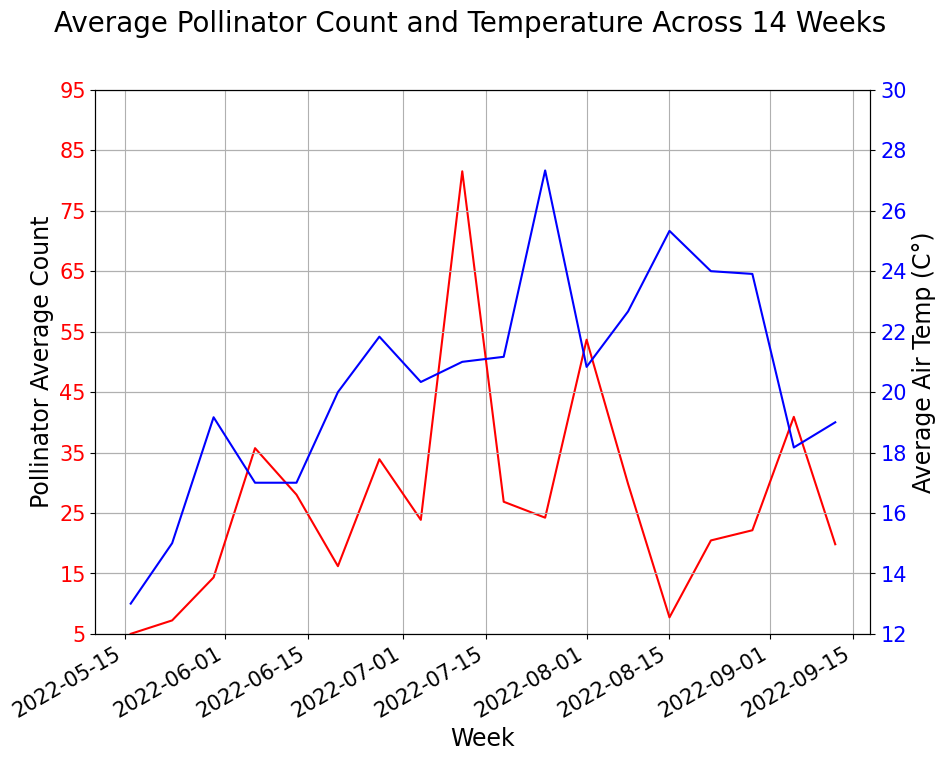

In [10]:
average_per_week(df)